<a href="https://colab.research.google.com/github/mahdiabouzeid/Spam-detection-random-forest/blob/main/Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/dataset/combined_data.csv'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(file_path)

In [ ]:
print("First five rows of the dataset:")
print(df.head())

First five rows of the dataset:
   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...


In [ ]:
df.dropna(subset=['text'], inplace=True)

In [ ]:
X = df['text']
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (66758, 5000)
Shape of X_test_tfidf: (16690, 5000)


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.63%


In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7938
           1       0.98      0.99      0.99      8752

    accuracy                           0.99     16690
   macro avg       0.99      0.99      0.99     16690
weighted avg       0.99      0.99      0.99     16690



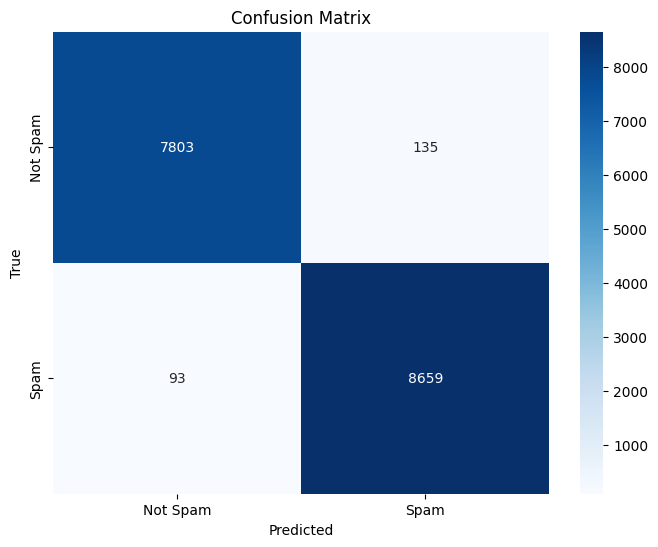

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

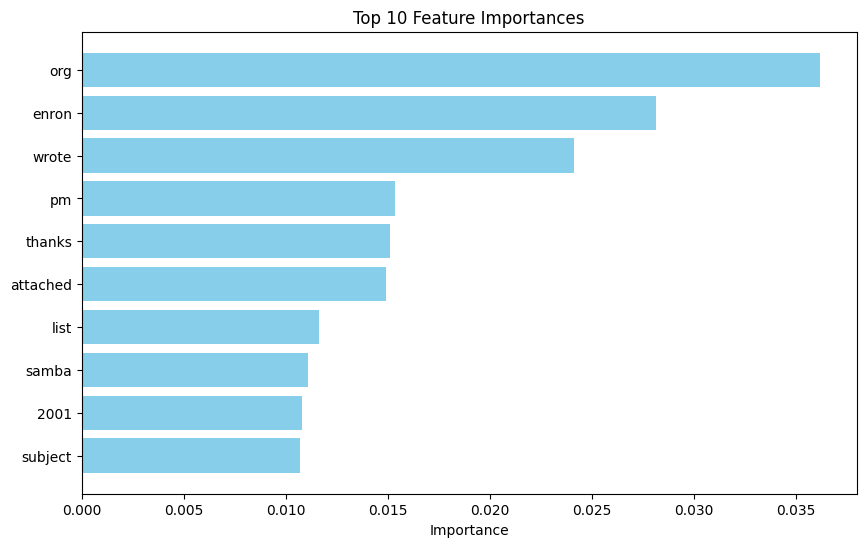

In [ ]:
importances = rf_classifier.feature_importances_
indices = importances.argsort()[::-1][:10]
top_features = [vectorizer.get_feature_names_out()[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), importances[indices], align="center", color="skyblue")
plt.yticks(range(len(top_features)), top_features)
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances")
plt.show()

In [ ]:
import joblib
joblib.dump(rf_classifier, 'spam_identifier.pkl')


['spam_identifier.pkl']

In [ ]:
from google.colab import files
files.download('spam_identifier.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>